# Technical Report and Code
## Titanic Data

#### Problem Statement

The RMS Titanic was a British liner that sank on April 15th 1912 during her maiden voyage. This report analyzes the Titanic data for 1309 passengers and crews to determine how passengers’ survival depended on other measured variables in the dataset.

### Finding the Data


The first part of data analysis or predictive modeling task is an initial exploration of the data. Finding form and quality of data. Taking initial data exploration with a big picture question in mind for the goal of analyzing and learning to see data tasking for   Visualization.

By looking at a new data set for the first time and to know how to perform various Python operations,data cleaning

Exploring the Titanic disaster training set available from Kaggle.com. The data set consists of 889 passengers who rode aboard the Titanic.



### Cleaning the Data

With a data set as small as the Titanic data, there's no real need to drop variables from a computing perspective.

This data set is provided in conjunction with a predictive modeling competition where the goal is to use the training data to predict whether passengers of the titanic listed in a second data set survived or not.



# Exploring The Variables

A exploratory analysis is reading in the data and then exploring the variables. Making a a sense of how many variables and cases there are, the data types of the variables and the range of values they take on...


## EDA

In [84]:
# Imports
# pandas

import pandas as pd
from pandas import Series, DataFrame

# # numpy, matplotlib,seaborn
import numpy as np
import patsy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# # machine learning
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



### Loading the datasets and exploring 

In [165]:
tita_df = pd.read_csv("/Users/aishwaryachinnari/Desktop/myproj/D/T/Titanic/genderclassmodel.csv")
tita_df.head(4)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0


In [86]:
tita_df_1 = pd.read_csv("/Users/aishwaryachinnari/Desktop/myproj/D/T/Titanic/train-3.csv")
tita_df_1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [87]:
tita_df_1.shape

(891, 12)

In [88]:
## Looking for missing values on my dataset
tita_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [89]:
tita_df_1.Cabin.describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [90]:
tita_df_1.Cabin.isnull().sum()

687

In [91]:
### Missing values calculations
tita_df_1.Sex.isnull().sum()

0

In [92]:
tita_df_1.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [93]:
## Missing values by port of Embarked
tita_df_1.Embarked.isnull().sum() ## 2 missing values

2

In [94]:
## Missing values by 
tita_df_1.Fare.isnull().sum()

0

### EDA

In [95]:
tita_df_1.groupby(['Sex','Embarked'])[['Survived']].count()

Survived
Sex    Embarked          
female C               73
       Q               36
       S              203
male   C               95
       Q               41
       S              441

In [96]:
tita_df_1.groupby(['Sex','Embarked'])[['Survived']].mean()

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603

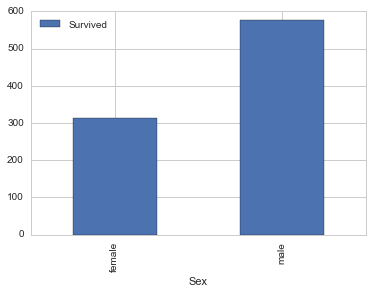

In [97]:
tita_df_1.groupby(['Sex'])[['Survived']].count().plot(kind='bar')
plt.show()

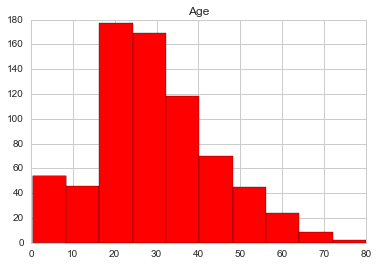

In [98]:
tita_df_1.hist(column="Age", color='r')
plt.show()

In [99]:
tita_df_1['Embarked'].head(3)

0    S
1    C
2    S
Name: Embarked, dtype: object

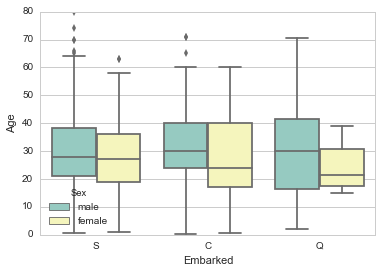

In [100]:
sns.boxplot(x="Embarked", y="Age", hue="Sex", data=tita_df_1, palette="Set3")
plt.show()

In [101]:
tita_df_1.groupby(['Cabin'])[['Survived']].count()
for df in tita_df_1['Cabin']:
    print df

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [102]:
clean = tita_df_1['Cabin'].dropna()
clean.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [103]:
for data in clean:
    a= data.split(' ')
    print (a[0])

C85
C123
E46
G6
C103
D56
A6
C23
B78
D33
B30
C52
B28
C83
F33
F
C23
E31
A5
D10
D26
C110
B58
E101
D26
F
D47
C123
B86
F2
C2
E33
B19
A7
C49
F4
A32
F2
B4
B80
G6
A31
D36
D15
C93
C83
C78
D35
G6
C87
B77
E67
B94
C125
C99
C118
D7
A19
B49
D
C22
C106
B58
E101
C22
C65
E36
C54
B57
C7
E34
C32
D
B18
C124
C91
C2
E40
T
F2
C23
F33
C128
E33
D37
B35
E50
C82
B96
D36
G6
C78
E10
C52
E44
B96
C23
A34
C104
C111
C92
E38
D21
E12
E63
D
A14
B49
C93
B37
C30
D20
C22
B79
C65
E25
D46
F33
B73
B18
C95
B38
B39
B22
C86
C70
A16
E67
C101
E25
E44
C68
A10
E68
B41
D20
A20
C125
F4
D19
D50
D9
A23
B50
B35
D33
A26
D48
E58
C126
B71
B51
D49
B5
B20
C68
F
C62
E24
E24
C90
C124
C126
F
C45
E101
E8
B5
B101
D45
C46
B57
B22
D30
E121
B77
B96
D11
E77
F38
B3
B20
D6
B82
D17
B96
A36
E8
B102
B69
E121
B28
E49
C47
C92
D28
E17
D17
A24
D35
B51
C50
B42
C148


In [104]:
#tita_df_1['Cabin'].apply(lambda x: x['Cabin'].split(' '), axis=1)
clean = clean.map(lambda x: x.split(', ')[0][0])
tita_df_1.Cabin = clean

tita_df_1.Cabin =pd.DataFrame(tita_df_1.Cabin.dropna())
tita_df_1.Cabin
tita_df_1.head(4)

tita_df_clean_cabin = tita_df_1.dropna(axis=0, how='any', inplace=False) ## almost clean dataset
# #tita_df_clean_cabin
cabin_su=tita_df_clean_cabin.groupby(['Cabin','Survived']).mean()

In [105]:
## Checking for missing values
tita_df_clean_cabin.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

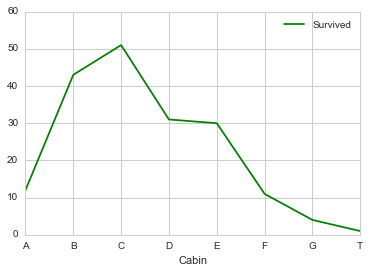

In [106]:
tita_df_clean_cabin.groupby(['Cabin'])[['Survived']].count().plot(kind='line', color='g')
plt.show()

## include title on your graph
## label your y axis

In [107]:
tita_df_clean_cabin.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S


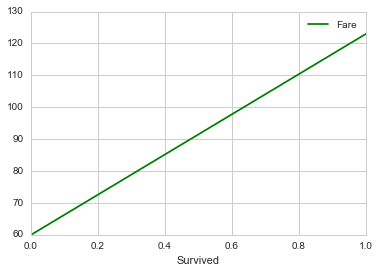

In [108]:
tita_df_clean_cabin.groupby(['Survived'])[['Fare']].count().plot(kind='line', color='g')
plt.show()

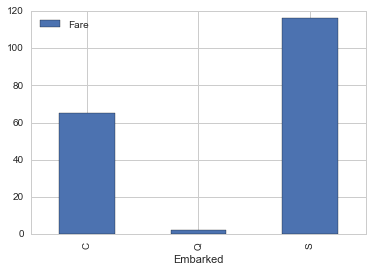

In [109]:
tita_df_clean_cabin.groupby(['Embarked'])[['Fare']].count().plot(kind = 'bar')
plt.show()

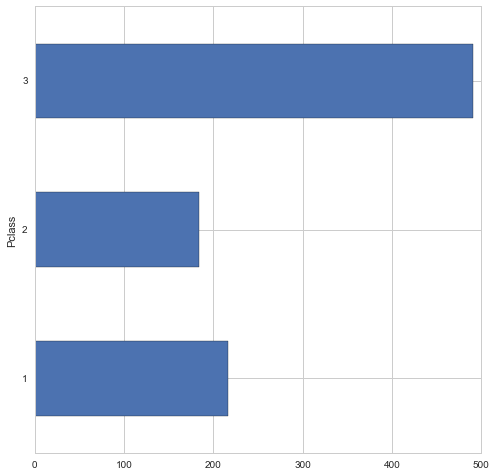

In [110]:
ax = tita_df_1.groupby("Pclass").size().plot(kind="barh", figsize =(8,8))

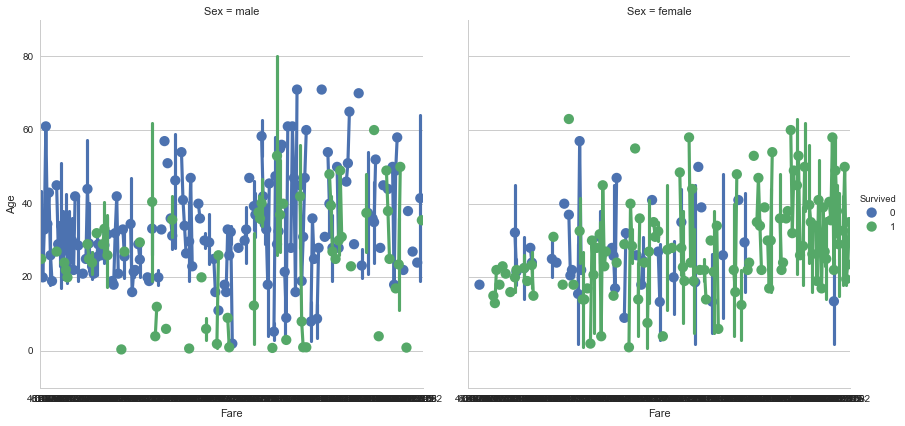

In [111]:
g = sns.factorplot("Fare","Age",
                  hue ="Survived",col ="Sex",data=tita_df_1, size=6)

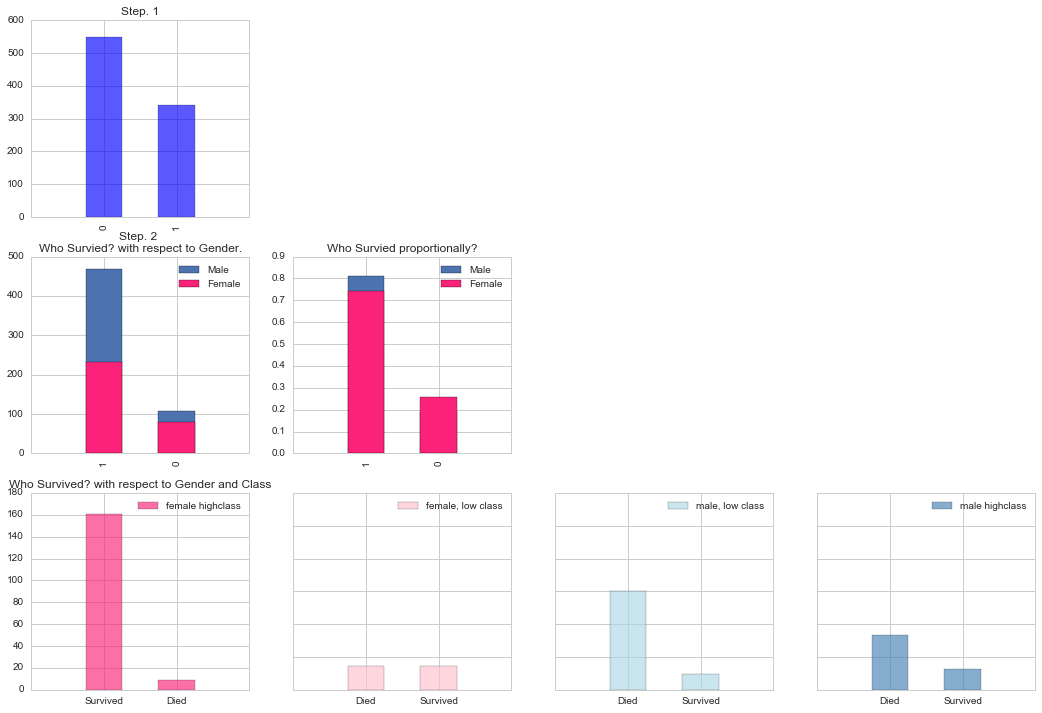

In [112]:
fig = plt.figure(figsize=(18,12))
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
tita_df_1.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(tita_df_1.Survived.value_counts()))
plt.title("Step. 1")

# # Step 2
ax2 = fig.add_subplot(345)
tita_df_1.Survived[tita_df_1.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
tita_df_1.Survived[tita_df_1.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(tita_df_1.Survived[tita_df_1.Sex == 'male'].value_counts()/float(tita_df_1.Sex[tita_df_1.Sex == 'male'].size)).plot(kind='bar',label='Male')
(tita_df_1.Survived[tita_df_1.Sex == 'female'].value_counts()/float(tita_df_1.Sex[tita_df_1.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# # Step 3
ax4 = fig.add_subplot(349)
female_highclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

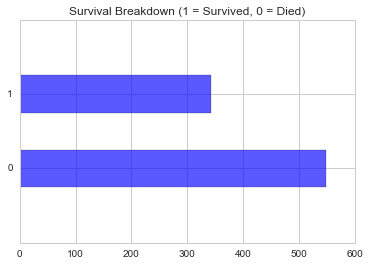

In [113]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
tita_df_1.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(tita_df_1.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")
plt.show()

(-1, 2)

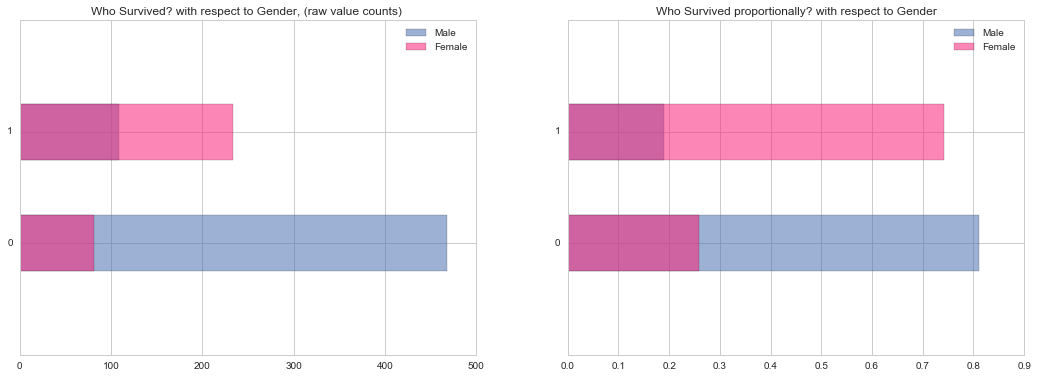

In [114]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = tita_df_1.Survived[tita_df_1.Sex == 'male'].value_counts().sort_index()
df_female = tita_df_1.Survived[tita_df_1.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)

ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

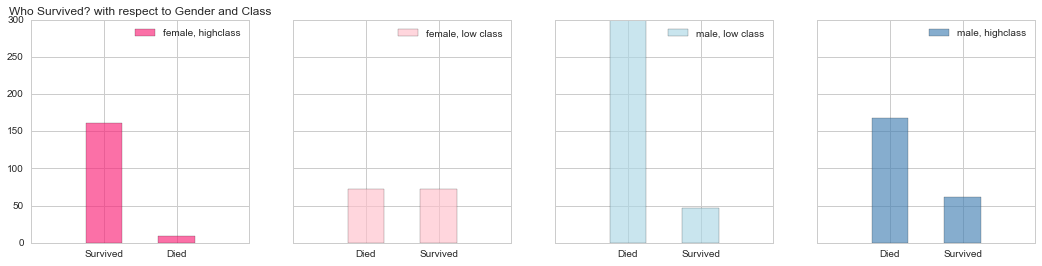

In [115]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')


ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'female'][tita_df_1.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = tita_df_1.Survived[tita_df_1.Sex == 'male'][tita_df_1.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
plt.show()

In [116]:
tita_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [117]:
## Changing Fare to integer
tita_df_1['Fare'] = tita_df_1['Fare'].astype(int)

In [118]:
tita_df_1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C,S


In [119]:
tita_df_1.ix[tita_df_1.Pclass <=2,"Pclass" ].iloc[0]

1

In [120]:
## Average Price of Ticket by passenger class
tita_df_1.groupby("Pclass").Fare.mean()

Pclass
1    83.745370
2    20.456522
3    13.173116
Name: Fare, dtype: float64

In [121]:
## Average age of survival
tita_df_1.groupby("Survived").Age.mean().ix[0,1]

30.626179245283019

In [122]:
cat = pd.Categorical(tita_df_1.Survived)
cat.describe()

,counts,freqs
categories,,
0,549,0.616162
1,342,0.383838



####################################################################
## Logistic Regression
####################################################################

In [123]:
### Base line
tita_df_1.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [124]:
## setting up my patsy formula
formula = 'Survived ~ C(PassengerId) + C(Sex) + C(Pclass) +Age +C(SibSp) +C(Parch) +C(Ticket) +Fare+ C(Cabin)+C(Embarked)'

In [125]:
## Defining my X and Y
Y, X = patsy.dmatrices(formula, data=tita_df_1,return_type='dataframe')

In [126]:
## Defining train and split
x_train, x_test, y_train, y_test = cross_validation.train_test_split(X,Y,test_size=.3)
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(128, 1597) (128, 1) (55, 1597) (55, 1)


In [127]:
## Defining logistic model and fit 

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
## Predicting
y_pred=model.predict(x_test)

In [129]:
## Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

confusion = pd.DataFrame(confmat, index=['Died','Survived'],
                         columns=['Predicteddied','Predictedsurvived'])

print(confusion)

          Predicteddied  Predictedsurvived
Died                 11                  8
Survived              4                 32


In [130]:
TP = confusion.ix['Died','Predicteddied'] 

FP = confusion.ix['Died','Predictedsurvived']

TN = confusion.ix['Survived','Predicteddied']

FN = confusion.ix['Survived','Predictedsurvived']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 11), ('False Positives', 8), ('True Negatives', 4), ('False Negatives', 32)]


In [131]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print cls_report

             precision    recall  f1-score   support

        0.0       0.73      0.58      0.65        19
        1.0       0.80      0.89      0.84        36

avg / total       0.78      0.78      0.77        55



In [132]:
y_pred[0:50]

array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.])

In [133]:
## Gridsearch the logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

In [134]:
## Filling the missingvalues with the average age
tita_df_1["Age"] = tita_df_1["Age"].fillna(tita_df_1["Age"].mean())
tita_df_1.Age.isnull().sum()

0

In [135]:
tita_df_1.head(3)
## Consider creating a new column that takes the value of 1 if Sex = male, or if Sex = female
## then add the column to your regression

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S


In [136]:
## Need to re-create the X and Y frames so I can do gridsearch
X= tita_df_1[['Pclass','SibSp','Parch','Age', 'Fare']]
X.head()

,Pclass,SibSp,Parch,Age,Fare
0,3,1,0,22.0,7
1,1,1,0,38.0,71
2,3,0,0,26.0,7
3,1,1,0,35.0,53
4,3,0,0,35.0,8


In [137]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass    891 non-null int64
SibSp     891 non-null int64
Parch     891 non-null int64
Age       891 non-null float64
Fare      891 non-null int64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [138]:
y = tita_df_1.Survived

In [139]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4)

In [140]:
## Now Gridsearch
grid = {
    'C': np.power(10.0, np.arange(0, 10))
}
gs = GridSearchCV(model, grid , scoring='roc_auc', cv=5, verbose=1)
gs.fit(Xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04,   1.00000e+05,   1.00000e+06,   1.00000e+07,
         1.00000e+08,   1.00000e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [141]:
print "Best estimator", gs.best_estimator_
print "Best params", gs.best_params_
print "Best Score", gs.best_score_


Best estimator LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best params {'C': 1.0}
Best Score 0.734375500873


In [142]:
ypred =gs.predict(Xtest)

In [143]:
## Confusion Matrix 
confmat = confusion_matrix(y_true=ytest, y_pred=ypred)

confusion = pd.DataFrame(confmat, index=['Died','Survived'],
                         columns=['Predicteddied','Predictedsurvived'])

print(confusion)

          Predicteddied  Predictedsurvived
Died                193                 31
Survived             78                 55


In [144]:
TP = confusion.ix['Died','Predicteddied'] 

FP = confusion.ix['Died','Predictedsurvived']

TN = confusion.ix['Survived','Predicteddied']

FN = confusion.ix['Survived','Predictedsurvived']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 193), ('False Positives', 31), ('True Negatives', 78), ('False Negatives', 55)]


In [145]:
from sklearn.metrics import classification_report
cls_report = classification_report(ytest, ypred)
print cls_report

             precision    recall  f1-score   support

          0       0.71      0.86      0.78       224
          1       0.64      0.41      0.50       133

avg / total       0.69      0.69      0.68       357



####################################################################
## DecisionTree Classifier
####################################################################

In [146]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import *
from IPython.display import display

In [147]:
dtc = DecisionTreeClassifier() ## change this to 2,3,4, none
dtc_params = {"max_depth" : [2,3,5,7, None]}

dtc_gs = GridSearchCV(dtc, dtc_params, verbose=1, n_jobs=-1, cv=5)

In [148]:
dtc_gs.fit(Xtrain, ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 5, 7, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [149]:
print "Best estimator", dtc_gs.best_estimator_
print "Best params", dtc_gs.best_params_
print "Best score", dtc_gs.best_score_

Best estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Best params {'max_depth': 3}
Best score 0.720973782772


In [150]:
ypred_dt = dtc_gs.predict(Xtest)
ypred_dt[0:12]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [151]:
## Confusion Matrix 
confmat = confusion_matrix(y_true=ytest, y_pred=ypred_dt)

confusion = pd.DataFrame(confmat, index=['Died','Survived'],
                         columns=['Predicteddied','Predictedsurvived'])

print(confusion)

          Predicteddied  Predictedsurvived
Died                201                 23
Survived             93                 40


In [152]:
TP = confusion.ix['Died','Predicteddied'] 

FP = confusion.ix['Died','Predictedsurvived']

TN = confusion.ix['Survived','Predicteddied']

FN = confusion.ix['Survived','Predictedsurvived']

print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 201), ('False Positives', 23), ('True Negatives', 93), ('False Negatives', 40)]


In [153]:
from sklearn.metrics import classification_report
cls_report = classification_report(ytest, ypred_dt)
print cls_report

             precision    recall  f1-score   support

          0       0.68      0.90      0.78       224
          1       0.63      0.30      0.41       133

avg / total       0.67      0.68      0.64       357



In [154]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

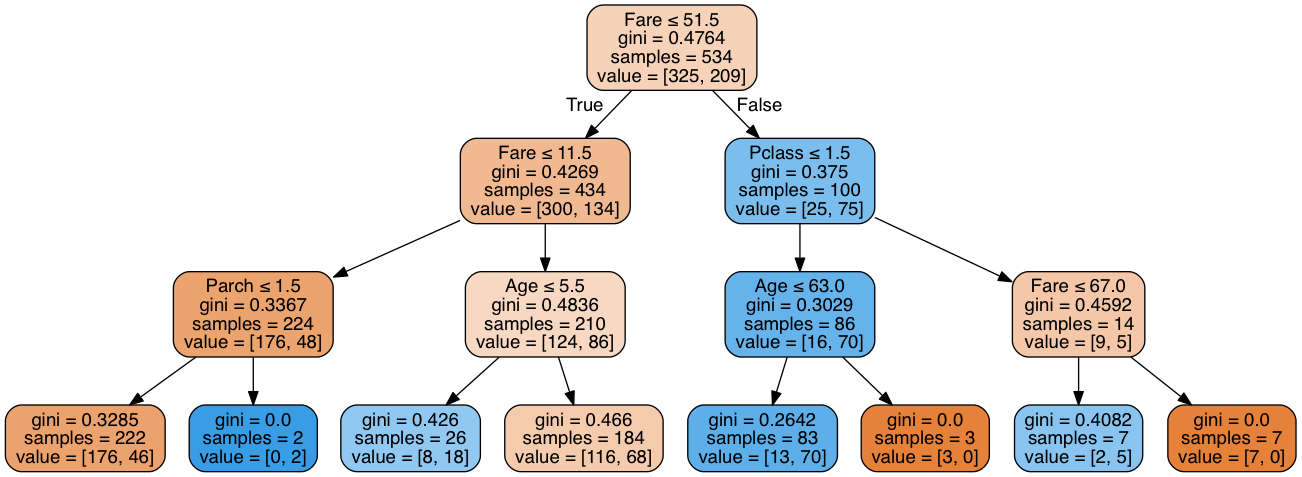

In [155]:
dot_data = StringIO()

export_graphviz(dtc_gs.best_estimator_, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True,
               feature_names=Xtrain.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [156]:
tree_class = dtc_gs.best_estimator_
features = pd.DataFrame({"features" : Xtrain.columns,
                         "importance" :tree_class.feature_importances_})
features.sort_values(by="importance", ascending=True)

,features,importance
1,SibSp,0.000000
2,Parch,0.041622
0,Pclass,0.083940
3,Age,0.148083
4,Fare,0.726355


### Random Forest Classification


In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rfc = RandomForestClassifier()
rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
    'min_samples_leaf':np.linspace(1,101,20),
    'n_estimators':[100]
}
## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

In [159]:
rf_gs.fit(Xtrain, ytrain)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed: 13.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'n_estimators': [100], 'max_depth': [1, 2, 3, None], 'min_samples_leaf': array([   1.     ,    6.26316,   11.52632,   16.78947,   22.05263,
         27.31579,   32.57895,   37.84211,   43.10526,   48.36842,
         53.63158,   58.89474,   64.15789,   69.42105,   74.68421,
         79.94737,   85.21053,   90.47368,   95.73684,  101.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [160]:
rfc_best = rf_gs.best_estimator_
print "best estimator", rfc_best
print "\n==========\n"
print "best parameters",  rf_gs.best_params_
print "\n==========\n"
print "best score", rf_gs.best_score_

best estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1.0,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


best parameters {'max_features': None, 'n_estimators': 100, 'max_depth': 1, 'min_samples_leaf': 1.0}


best score 0.60861423221


In [161]:
## Print Feature importances
feature_importance = pd.DataFrame({ 'feature':Xtrain.columns, 
                                   'importance':rfc_best.feature_importances_
                                  })
feature_importance.sort_values('importance', ascending=True, inplace=True)
feature_importance

,feature,importance
0,Pclass,0.0
1,SibSp,0.0
2,Parch,0.0
3,Age,0.0
4,Fare,0.0


In [162]:
## Predict 
y_pred_rfc= rfc_best.predict(Xtest)
print y_pred_rfc.shape, y_test.shape

(357,) (55, 1)


In [163]:
## Confusion Matrix 
confmat = confusion_matrix(y_true=ytest, y_pred=y_pred_rfc)

confusion = pd.DataFrame(confmat, index=['Died','Survived'],
                         columns=['Predicteddied','Predictedsurvived'])

print(confusion)

          Predicteddied  Predictedsurvived
Died                224                  0
Survived            133                  0


In [164]:
##Print classification report
from sklearn.metrics import classification_report
cls_rep = classification_report(ytest, y_pred_rfc)
print cls_rep

             precision    recall  f1-score   support

          0       0.63      1.00      0.77       224
          1       0.00      0.00      0.00       133

avg / total       0.39      0.63      0.48       357



###Conclusion:
to predict if an individual will survive based on the features in the data like:
Survived ~ (Pclass + Sex + Age + SibSp + Parch + Fare + Embarked)
I found that ~74% of the women onboard survived, while only ~19% of the men did and People survived w.r.t to fare prices!

